# BIA 6303 - Homework 1, Notebook 2
# Eric Long

In [94]:
#environmental setup
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#increase lines of output (for troubleshooting)
pd.set_option('display.max_colwidth', 15000)
pd.set_option('display.max_rows', 5000)

## 1. Read in the Churn Calls dataset (a, b)

In [95]:
#read in auto.csv
path = 'C:/Users/el033195/OneDrive - Cerner Corporation/PERSONAL/Data Science/BIA6303 - Predictive Models/BIA6303PredictiveModels/Module1/data/'
churn = pd.read_csv(path + 'Churn_Calls.csv')

In [96]:
#test print
#print(churn.head()) #commented out for readability
print(churn.shape)
print(churn.dtypes)

(5000, 20)
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object


## 2. Set target variable as churn (yes/no) (c)

In [97]:
#move the churn column to the front of the dataframe
#code taken from module 1 "scikit_learn_intro" and https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5
target_var = 'churn'
temp_hold = churn[target_var]
churn.drop(labels=target_var, axis=1, inplace=True)
churn.insert(0, target_var, temp_hold)

## 3. Perform EDA (d)

In [98]:
#check for any missing data
#code taken from https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
churn.isna().sum()

#no missing data

churn                            0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

churn
no     4293
yes     707
Name: churn, dtype: int64
Percent Churn: 14.14%


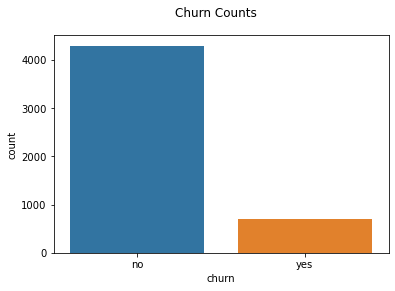

In [99]:
#check distribution of churn variable
#some code taken from module 1 "scikit_learn_intro"
print((churn.groupby(target_var))[target_var].aggregate(len))
sns.countplot(x='churn', data=churn)
plt.suptitle('Churn Counts')
print('Percent Churn: ' + str((churn[churn[target_var] == 'yes'].count()[target_var]/churn.count()[target_var])*100) + '%')

85.86% of people do not "churn". Our models need to be at least this accurate. However, our data isn't very balanced so this could skew the results.

In [100]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 4. Transform categorical data into dummies (e)

In [101]:
#first look at variable types
churn.dtypes

churn                             object
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [102]:
#convert the churn variable into numeric
#code taken from module 1 "scikit_learn_intro"
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
churn['churn'] = le_dep.fit_transform(churn['churn'])

In [103]:
#function to transform categorical data into dummies
#will also fill out missing data, if applicable
#code taken from module 1 "scikit_learn_intro"
for col in churn.columns[1:]:
	attName = col
	dType = churn[col].dtype
	missing = pd.isnull(churn[col]).any()
	uniqueCount = len(churn[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		churn = pd.concat([churn, pd.get_dummies(churn[col], prefix=col)], axis=1)
		del churn[attName]

In [104]:
churn.shape

(5000, 74)

In [105]:
churn.columns

Index(['churn', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'sta

In [106]:
churn.head()

,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,1,0,175.2,74,29.78,151.7,79,12.89,230.5,...,0,0,0,1,0,0,1,0,1,0
1,0,36,30,146.3,128,24.87,162.5,80,13.81,129.3,...,0,0,0,1,0,0,1,0,0,1
2,1,36,19,171.9,96,29.22,198.4,111,16.86,321.7,...,0,0,0,0,1,0,0,1,0,1
3,0,41,0,159.3,66,27.08,125.9,75,10.70,261.9,...,0,0,0,0,1,0,1,0,1,0
4,0,42,0,171.0,129,29.07,183.9,96,15.63,130.2,...,0,0,0,0,1,0,1,0,1,0


In [107]:
churn.describe()

,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.141400,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,...,0.021200,0.03160,0.023000,0.25180,0.499000,0.249200,0.905400,0.094600,0.735400,0.264600
std,0.348469,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,...,0.144065,0.17495,0.149918,0.43409,0.500049,0.432593,0.292691,0.292691,0.441164,0.441164
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,...,0.000000,0.00000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,...,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Create training and test sets (f)

In [108]:
#split dataset into 60/40
#X = features
#Y = target
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    churn.iloc[:,1:].values, churn.iloc[:,0].values, test_size=0.40, random_state=2)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3000, 73)
(2000, 73)
(3000,)
(2000,)


## 6. Perform decision tree classifier (g)

In [110]:
#build the model, no modifications initially
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(random_state=0)

In [111]:
#train the model
clf_dt = clf_dt.fit(X_train, Y_train)

In [112]:
#validate the model
target_predicted_dt = clf_dt.predict(X_test)

In [113]:
#model classification report
from sklearn import metrics
print('Decision Tree Accuracy = ', metrics.accuracy_score(Y_test, target_predicted_dt))
print(metrics.classification_report(Y_test, target_predicted_dt))

Decision Tree Accuracy =  0.912
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1713
           1       0.67      0.77      0.72       287

    accuracy                           0.91      2000
   macro avg       0.81      0.85      0.83      2000
weighted avg       0.92      0.91      0.91      2000



In [114]:
#model confusion matrix
print(metrics.confusion_matrix(Y_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
#code taken from module 1 "scikit_learn_intro"
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

[[1603  110]
 [  66  221]]
True Negatives:  1603
False Positives:  110
False Negatives:  66
True Positives:  221


In [115]:
#decision tree, round 2 - two modifications to the default arguments
#first, lets see how deep our initial tree went
clf_dt.get_depth()

19

In [116]:
#change default criterion from gini to entropy and reduce the max depth of the tree
clf_dt_2 = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=15)
clf_dt_2 = clf_dt_2.fit(X_train, Y_train)
target_predicted_dt_2 = clf_dt_2.predict(X_test)
print('Decision Tree Accuracy = ', metrics.accuracy_score(Y_test, target_predicted_dt_2))
print(metrics.classification_report(Y_test, target_predicted_dt_2))

Decision Tree Accuracy =  0.927
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1713
           1       0.73      0.79      0.76       287

    accuracy                           0.93      2000
   macro avg       0.84      0.87      0.86      2000
weighted avg       0.93      0.93      0.93      2000



In [117]:
#model confusion matrix
print(metrics.confusion_matrix(Y_test, target_predicted_dt))

#extracting true_positives, false_positives, true_negatives, false_negatives
#code taken from module 1 "scikit_learn_intro"
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, target_predicted_dt).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

[[1603  110]
 [  66  221]]
True Negatives:  1603
False Positives:  110
False Negatives:  66
True Positives:  221


## 7. Perform cross validation of the decision tree (h)

In [118]:
#cross validate decision tree using cv=10
#code taken from module 1 "scikit_learn_intro"
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_dt_2, X_train, Y_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()

Cross Validation Score for each K [0.93666667 0.90333333 0.92333333 0.89666667 0.93       0.88666667
 0.92666667 0.93666667 0.93333333 0.91333333]


0.9186666666666667

## 8. Perform K nearest neighbors classifier (i)

In [119]:
#build model with KNN = 3
#code taken from module 1 "scikit_learn_intro"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler
knn = KNeighborsClassifier()
clf_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

In [120]:
#train model
clf_knn = clf_knn.fit(X_train, Y_train)

In [121]:
#validate model
target_predicted_knn = clf_knn.predict(X_test)

In [122]:
#model classification report
print("KNN Accuracy Score = ", metrics.accuracy_score(Y_test, target_predicted_knn))
print(metrics.classification_report(Y_test, target_predicted_knn))

KNN Accuracy Score =  0.8565
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1713
           1       0.50      0.15      0.23       287

    accuracy                           0.86      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.82      0.86      0.82      2000



In [123]:
#model confusion matrix
print(metrics.confusion_matrix(Y_test, target_predicted_knn))

#extracting true_positives, false_positives, true_negatives, false_negatives
#code taken from module 1 "scikit_learn_intro"
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, target_predicted_knn).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

[[1671   42]
 [ 245   42]]
True Negatives:  1671
False Positives:  42
False Negatives:  245
True Positives:  42


## 9. Perform cross validation of KNN (j)

In [124]:
#cross validate KNN using cv=10
#code taken from module 1 "scikit_learn_intro"
from sklearn.model_selection import cross_val_score
scores_2 = cross_val_score(clf_knn, X_train, Y_train, cv=10)
print("Cross Validation Score for each K",scores_2)
scores_2.mean()

Cross Validation Score for each K [0.85       0.85       0.85       0.85666667 0.85333333 0.85666667
 0.87       0.84333333 0.84333333 0.85      ]


0.8523333333333334

Overall, this classifier has worse accuracy than the previous KNN model. Also, this model has lower accuracy than the rate of people who don't churn, making it a poor model.

## 10. Perform another classifier (k)

In [125]:
#perform logistic regression
#code taken from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, Y_train)
target_predicted_lr = clf_lr.predict(X_test)

In [126]:
#model classification report
print("Logistic Regression Accuracy Score = ", metrics.accuracy_score(Y_test, target_predicted_lr))
print(metrics.classification_report(Y_test, target_predicted_lr))

Logistic Regression Accuracy Score =  0.8645
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1713
           1       0.57      0.24      0.33       287

    accuracy                           0.86      2000
   macro avg       0.73      0.60      0.63      2000
weighted avg       0.84      0.86      0.84      2000



In [127]:
#model confusion matrix
print(metrics.confusion_matrix(Y_test, target_predicted_lr))

#extracting true_positives, false_positives, true_negatives, false_negatives
#code taken from module 1 "scikit_learn_intro"
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, target_predicted_lr).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

[[1661   52]
 [ 219   68]]
True Negatives:  1661
False Positives:  52
False Negatives:  219
True Positives:  68


## 11. Which classifier performs best? (l)

In terms of accuracy, the modified Decision Tree performs the best being 92.7% accurate. This model also has the highest precision and recall for "churn" class. Finally, the model has very high precision for the "not churn" class (96%). The recall for the same class is comparible to the other models at 95%